Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
symmetries =  ['1A1']
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3


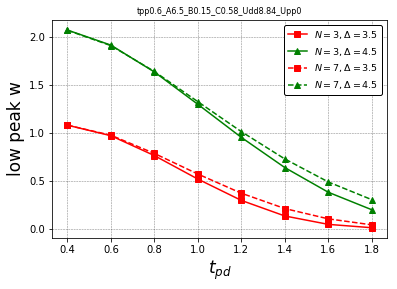

In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
tpp = 0.6

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

kx = 0.0
ky = 0.0
Npts = 8

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

Norb3 = 3
Norb7 = 7
Mc3 = 120
Mc7 = 60

fNorb3 = 'Norb3_tpp'+str(tpp)+'_Udd'+str(Udd)+'_Upp'+str(Upp) \
         +'_kx'+str(kx)+'_ky'+str(ky)+'_Mc'+str(Mc3)+'_proj0.txt'
fNorb7 = 'Norb7_1A1_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp) \
          +'_kx'+str(kx)+'_ky'+str(ky)+'_Mc'+str(Mc7)+'_proj0.txt'
titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)      

##########################################################################
# E of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']
a = loadtxt('./data_lowpeak/'+fNorb3,skiprows=0)
  
#plot(a[0:Npts,1], a[0:Npts,2], '-bo', label="$N=3, \Delta=2.5$")
plot(a[0:Npts,1], a[0:Npts,2], '-rs', label="$N=3, \Delta=3.5$")
plot(a[Npts:2*Npts,1], a[Npts:2*Npts,2], '-g^', label="$N=3, \Delta=4.5$")

a = loadtxt('./data_lowpeak/'+fNorb7,skiprows=0)
  
#plot(a[0:Npts,1], a[0:Npts,2], '--bo', label="$N=7, \Delta=2.5$")
plot(a[0:Npts,1], a[0:Npts,2], '--rs', label="$N=7, \Delta=3.5$")
plot(a[Npts:2*Npts,1], a[Npts:2*Npts,2], '--g^', label="$N=7, \Delta=4.5$")

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
ylabel('low peak w',fontsize=17)
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("lat_w_lowpeak_"+titlename+".pdf")

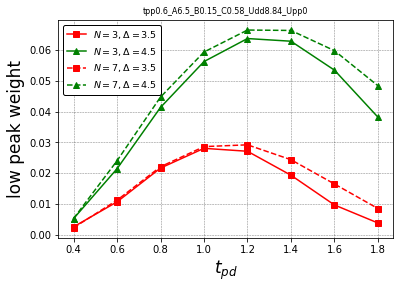

In [2]:
##########################################################################
# weight of lowest peak
##########################################################################
#clf()
a = loadtxt('./data_lowpeak/'+fNorb3,skiprows=0)

#plot(a[0:Npts,1], a[0:Npts,2], '-bo', label="$N=3, \Delta=2.5$")
plot(a[0:Npts,1], a[0:Npts,3], '-rs', label="$N=3, \Delta=3.5$")
plot(a[Npts:2*Npts,1], a[Npts:2*Npts,3], '-g^', label="$N=3, \Delta=4.5$")

a = loadtxt('./data_lowpeak/'+fNorb7,skiprows=0)
  
#plot(a[0:Npts,1], a[0:Npts,2], '--bo', label="$N=7, \Delta=2.5$")
plot(a[0:Npts,1], a[0:Npts,3], '--rs', label="$N=7, \Delta=3.5$")
plot(a[Npts:2*Npts,1], a[Npts:2*Npts,3], '--g^', label="$N=7, \Delta=4.5$")

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
ylabel('low peak weight',fontsize=17)
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("lat_weight_lowpeak_"+titlename+".pdf")